# CAR Sales prediction

## Exploratory Data Analysis and Machine Learning Model Building

AUTHOR - SEHAJ MALHOTRA - https://www.linkedin.com/in/sehajmalhotra/


DATASET - https://www.kaggle.com/datasets/mohdshahnawazaadil/sales-prediction-dataset/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('car_purchasing.csv', encoding= 'latin-1')

In [3]:
data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,42,62812,11609,238961,35321
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,41,66647,9573,530974,45116
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43,53799,11160,638467,42926
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58,79370,14426,548599,67422
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57,59729,5359,560304,55915


In [4]:
data.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.222000,9607.644000,431475.700000,44209.808000
std,0.500465,7.990339,11703.386599,3489.180032,173536.758223,10773.145934
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54392.000000,7397.500000,299824.000000,37629.750000
50%,1.000000,46.000000,62915.500000,9655.000000,426750.000000,43997.500000
75%,1.000000,52.000000,70118.250000,11799.000000,557324.500000,51254.750000
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer name        500 non-null    object
 1   customer e-mail      500 non-null    object
 2   country              500 non-null    object
 3   gender               500 non-null    int64 
 4   age                  500 non-null    int64 
 5   annual Salary        500 non-null    int64 
 6   credit card debt     500 non-null    int64 
 7   net worth            500 non-null    int64 
 8   car purchase amount  500 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 35.3+ KB


In [6]:
data.duplicated().sum()

0

In [7]:
data.isna().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

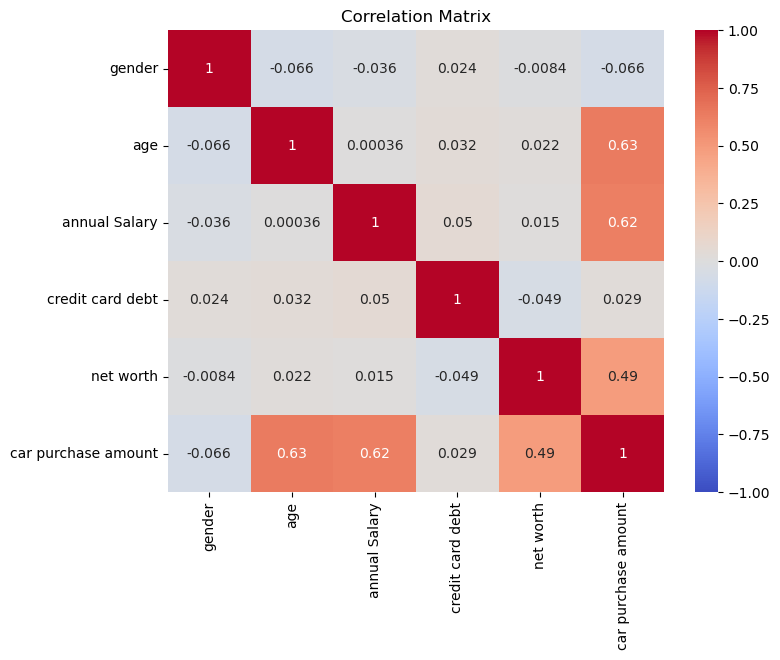

In [8]:
#Correlation matrix
df_numeric = data.drop(['customer name', 'customer e-mail', 'country'], axis=1)

# Calculating the correlation matrix
corr_matrix = df_numeric.corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [9]:
corr_matrix = df_numeric.corr()['car purchase amount'].sort_values(ascending=False)
corr_matrix

car purchase amount    1.000000
age                    0.633273
annual Salary          0.617861
net worth              0.488580
credit card debt       0.028888
gender                -0.066407
Name: car purchase amount, dtype: float64

##### The purchase of car is *HIGHLY* correlated with AGE and is *LEAST* correlated with CREDIT CARD DEBT

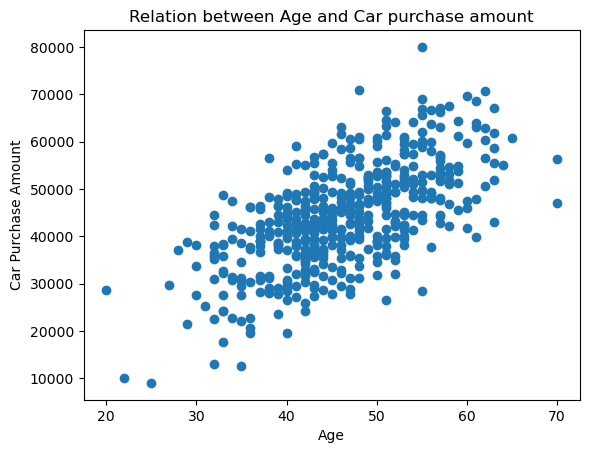

In [10]:
plt.scatter(data['age'], data['car purchase amount'])
plt.title('Relation between Age and Car purchase amount')
plt.xlabel('Age')
plt.ylabel('Car Purchase Amount')
plt.show()

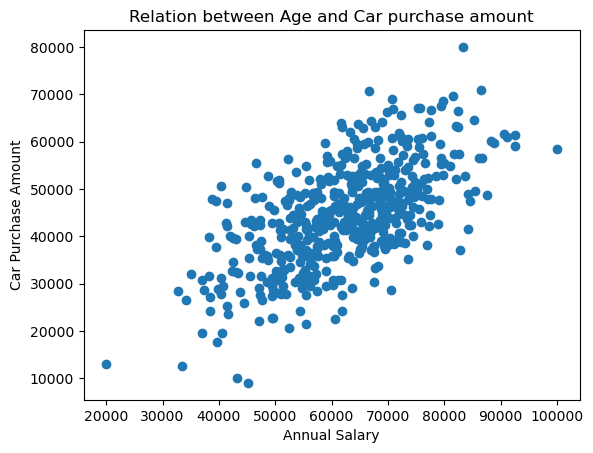

In [11]:
plt.scatter(data['annual Salary'], data['car purchase amount'])
plt.title('Relation between Age and Car purchase amount')
plt.xlabel('Annual Salary')
plt.ylabel('Car Purchase Amount')
plt.show()

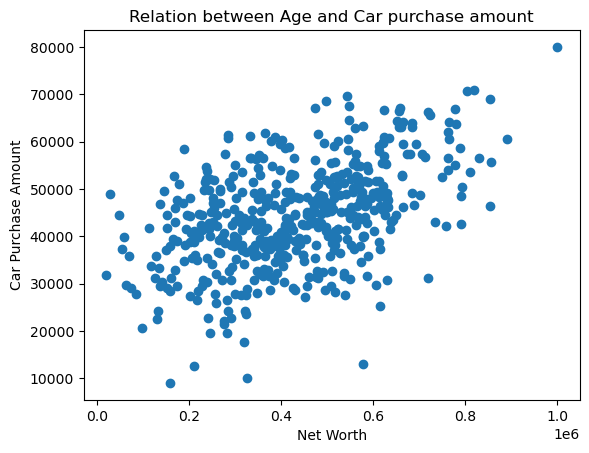

In [12]:
plt.scatter(data['net worth'], data['car purchase amount'])
plt.title('Relation between Age and Car purchase amount')
plt.xlabel('Net Worth')
plt.ylabel('Car Purchase Amount')
plt.show()

In [13]:
data.drop(['customer name', 'customer e-mail'], axis=1, inplace=True)
data.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,42,62812,11609,238961,35321
1,Belize,0,41,66647,9573,530974,45116
2,Algeria,1,43,53799,11160,638467,42926
3,Cook Islands,1,58,79370,14426,548599,67422
4,Brazil,1,57,59729,5359,560304,55915


In [14]:
data['gender'] = data['gender'].map({0:'Male', 1:'Female'})
data.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,Male,42,62812,11609,238961,35321
1,Belize,Male,41,66647,9573,530974,45116
2,Algeria,Female,43,53799,11160,638467,42926
3,Cook Islands,Female,58,79370,14426,548599,67422
4,Brazil,Female,57,59729,5359,560304,55915


In [15]:
net_worth = data.groupby('gender')['net worth'].mean()
print(f"The mean net worth of Male is {round(net_worth['Male'],2)}, and the mean net worth of Female is {net_worth['Female']:.2f}")

The mean net worth of Male is 432948.72, and the mean net worth of Female is 430037.62


In [16]:
car_value = data.groupby('gender')['car purchase amount'].mean()
print(f"The mean car value of Male is {round(car_value['Male'],2)}, and the mean car value of Female is {car_value['Female']:.2f}")

The mean car value of Male is 44933.14, and the mean car value of Female is 43503.63


In [17]:
annual_sal = data.groupby('gender')['annual Salary'].mean()
print(f"The mean annual salary of Male is {round(annual_sal['Male'],2)}, and the mean annual salary of Female is {annual_sal['Female']:.2f}")

The mean annual salary of Male is 62559.1, and the mean annual salary of Female is 61705.59


In [18]:
card_debt = data.groupby('gender')['credit card debt'].mean()
print(f"The mean credit card debt of Male is {round(card_debt['Male'],2)}, and the mean credit card debt of Female is {card_debt['Female']:.2f}")

The mean credit card debt of Male is 9522.29, and the mean credit card debt of Female is 9690.97


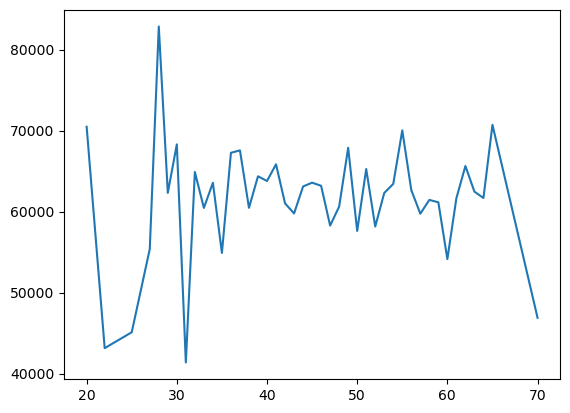

In [19]:
#Effect of Age on Annual Income
age_annual_salary = data.groupby('age')['annual Salary'].median()
plt.plot(age_annual_salary)

##### We can see that annual earnings increase significantly after age 20 until around age 28. Then in our data we see a landslide in median earnings and then around age 34 they jump to a high point to stabilize around 65,000. For the next 30 years or so there is a stagnation in earnings and a slow slide downward after age 60 with some exceptions.

In [20]:
def age_grp(row):
    if row['age'] < 30:
        return '20 - 30'
    elif row['age'] < 40:
        return '30 - 40'
    elif row['age'] < 50:
        return '40 - 50'
    elif row['age'] < 60:
        return '50 - 60'
    else:
        return '60 - 70'

In [21]:
data['age ranges'] = data.apply(age_grp, axis = 1)
data.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount,age ranges
0,Bulgaria,Male,42,62812,11609,238961,35321,40 - 50
1,Belize,Male,41,66647,9573,530974,45116,40 - 50
2,Algeria,Female,43,53799,11160,638467,42926,40 - 50
3,Cook Islands,Female,58,79370,14426,548599,67422,50 - 60
4,Brazil,Female,57,59729,5359,560304,55915,50 - 60


<Axes: >

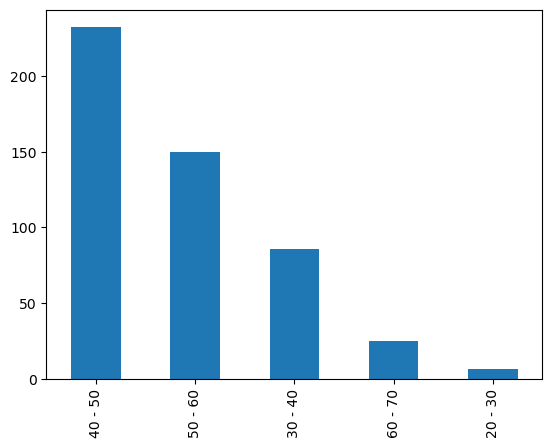

In [22]:
fig, ax = plt.subplots()
data['age ranges'].value_counts().plot(ax=ax, kind='bar')

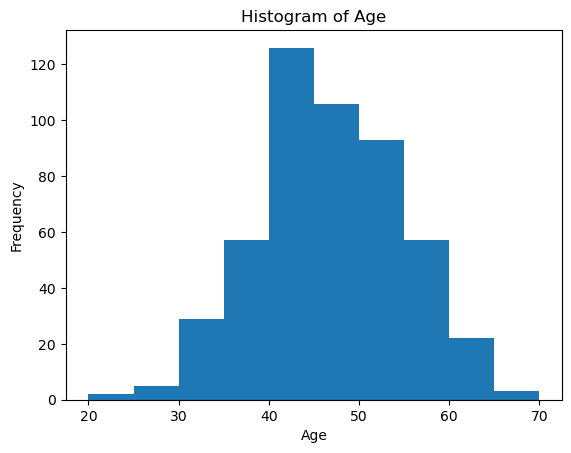

In [23]:
plt.hist(data['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

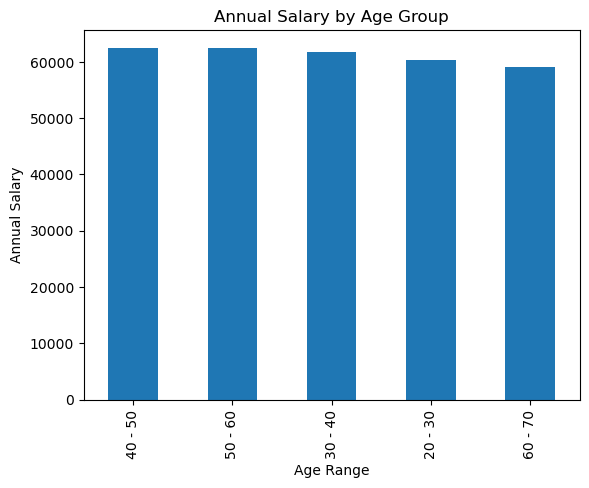

In [24]:
data.groupby('age ranges')['annual Salary'].mean().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Annual Salary by Age Group')
plt.xlabel('Age Range')
plt.ylabel('Annual Salary')
plt.show()

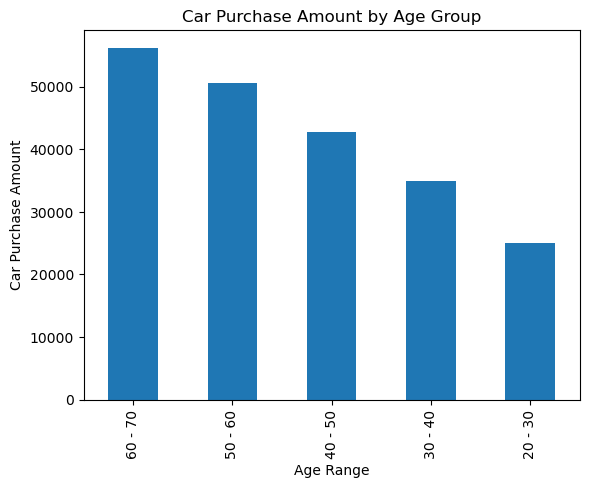

In [25]:
data.groupby('age ranges')['car purchase amount'].mean().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Car Purchase Amount by Age Group')
plt.xlabel('Age Range')
plt.ylabel('Car Purchase Amount')
plt.show()

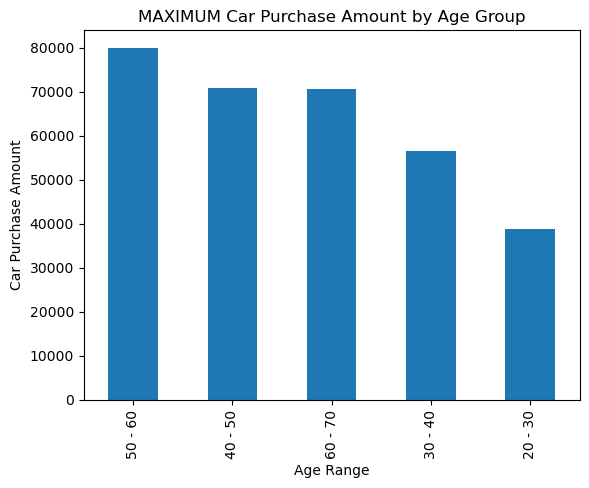

In [26]:
data.groupby('age ranges')['car purchase amount'].max().sort_values(ascending = False).plot(kind = 'bar')
plt.title('MAXIMUM Car Purchase Amount by Age Group')
plt.xlabel('Age Range')
plt.ylabel('Car Purchase Amount')
plt.show()

In [27]:
ds = data.groupby(['age ranges', 'gender'])['car purchase amount'].mean().reset_index()

In [28]:
ds

,age ranges,gender,car purchase amount
0,20 - 30,Female,24728.500000
1,20 - 30,Male,25277.666667
2,30 - 40,Female,34653.224490
3,30 - 40,Male,35295.594595
4,40 - 50,Female,41618.432203
5,40 - 50,Male,43983.526316
6,50 - 60,Female,51447.569444
7,50 - 60,Male,49884.641026
8,60 - 70,Female,59429.700000
9,60 - 70,Male,54106.066667


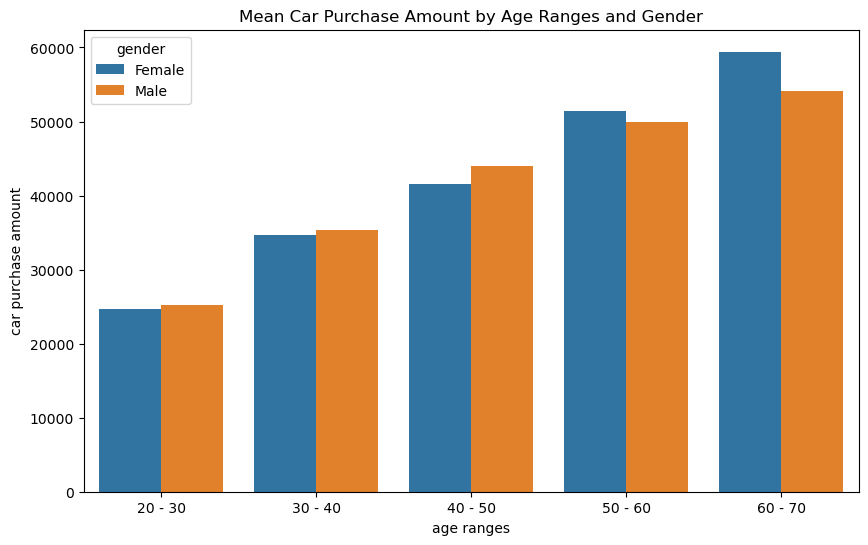

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x= 'age ranges', y = 'car purchase amount', hue = 'gender', data = ds)
plt.title('Mean Car Purchase Amount by Age Ranges and Gender')
plt.show()

#### FEATURE ENGINEERING

In [30]:
data.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount,age ranges
0,Bulgaria,Male,42,62812,11609,238961,35321,40 - 50
1,Belize,Male,41,66647,9573,530974,45116,40 - 50
2,Algeria,Female,43,53799,11160,638467,42926,40 - 50
3,Cook Islands,Female,58,79370,14426,548599,67422,50 - 60
4,Brazil,Female,57,59729,5359,560304,55915,50 - 60


In [31]:
X = data[['age', 'annual Salary', 'net worth']]
y = data[['car purchase amount']]

In [32]:
X

,age,annual Salary,net worth
0,42,62812,238961
1,41,66647,530974
2,43,53799,638467
3,58,79370,548599
4,57,59729,560304
...,...,...,...
495,41,71942,541670
496,38,56039,360419
497,54,68889,764531
498,59,49812,337827


In [33]:
y

,car purchase amount
0,35321
1,45116
2,42926
3,67422
4,55915
...,...
495,48901
496,31491
497,64147
498,45442


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
X_train = scaler.fit_transform(X_train)

In [38]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [39]:
X_test = scaler.fit_transform(X_test)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [41]:
def modelresults(predictions):
    print('Mean absolute error on model is: {}'.format(mean_absolute_error(y_test, predictions)))
    print('Root mean squared error on model is: {}'.format(np.sqrt(mean_squared_error(y_test, predictions))))

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [43]:
lr.fit(X_train, y_train)

LinearRegression()

In [44]:
predicted_values_LR = lr.predict(X_test)

In [45]:
modelresults(predicted_values_LR)

Mean absolute error on model is: 727.4943242120935
Root mean squared error on model is: 892.9506127016974


In [46]:
data['car purchase amount'].describe()

count      500.000000
mean     44209.808000
std      10773.145934
min       9000.000000
25%      37629.750000
50%      43997.500000
75%      51254.750000
max      80000.000000
Name: car purchase amount, dtype: float64

## Trying SVM Model

In [47]:
from sklearn.svm import SVR

In [48]:
svrmodel = SVR()

In [49]:
param_gridsvr = {'C': [0.01, 0.1, 0.5], 'kernel': ['linear', 'rbf', 'poly'], 'degree': [2,3,4]}

In [50]:
from sklearn.model_selection import GridSearchCV
gridsvr = GridSearchCV(svrmodel, param_gridsvr)

In [51]:
gridsvr.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.5], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly']})

In [52]:
predicted_values_gridsvr = gridsvr.predict(X_test)

In [53]:
modelresults(predicted_values_gridsvr)

Mean absolute error on model is: 8515.387211095414
Root mean squared error on model is: 10706.297174035926


In [54]:
gridsvr.best_params_

{'C': 0.5, 'degree': 2, 'kernel': 'linear'}

## Trying Random Forest Model

In [55]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor()
param_gridrfr = {'max_depth': [8,9,10,11,12], 'n_estimators': [11,10,12,13,14,15,16,17]}

In [56]:
gridrfr = GridSearchCV(rfrmodel, param_gridrfr)

In [57]:
gridrfr.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [8, 9, 10, 11, 12],
                         'n_estimators': [11, 10, 12, 13, 14, 15, 16, 17]})

In [58]:
predicted_values_gridrfr = gridrfr.predict(X_test)

In [59]:
modelresults(predicted_values_gridrfr)

Mean absolute error on model is: 2072.2332575905575
Root mean squared error on model is: 3071.9041748671925


In [60]:
gridrfr.best_params_

{'max_depth': 11, 'n_estimators': 15}

## Finalizing Linear Regression Model

In [61]:
lr

LinearRegression()

In [62]:
joblib.dump(lr, 'model.pkl')

['model.pkl']

### Linear Regression has shown the best results!!!!